### Import libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [122]:
# Import dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv", header=0)
df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [124]:
# View the first five values of the dataframe
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [125]:
# Round up the values in "Screen_Size_cm" to two decimal places
df["Screen_Size_cm"] = np.round(df["Screen_Size_cm"], 2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


## STEP 1 - HANDLING MISSING VALUES

In [126]:
# Identify the total number of missing values in the dataset
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [127]:
# Replace the missing values in "Weight_kg" with the mean
avg_Weight_kg = df["Weight_kg"].astype("float").mean(axis=0)
df["Weight_kg"].replace(np.nan, avg_Weight_kg, inplace=True)

In [128]:
# Replace the missing values in "Screen_Size_cm" with the mode
common_screen_size = df["Screen_Size_cm"].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

## STEP 2 - FIX THE DATA TYPES


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  238 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       238 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [130]:
# Convert the object data types "Weight_kg", "Screen_Size_cm" to float data type
df[["Weight_kg", "Screen_Size_cm"]] = df[["Weight_kg", "Screen_Size_cm"]].astype("float")

## STEP 3 - DATA STANDARDIZATION

In [131]:
# Convert "weight" in kg to pounds
# 1 kg = 2.205 pounds
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={"Weight_kg" : "Weight_pounds"}, inplace=True)

# Convert "Screen_Size" in cm to inches
# 1 inch = 2.54 cm
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={"Screen_Size_cm": "Screen_Size_inches"}, inplace=True)

## STEP 4 - DATA NORMALIZATION

In [141]:
# "CPU_frequency", a continuous variable should be normalized with respect to the maximum value
df["CPU_frequency"] = df["CPU_frequency"]/df["CPU_frequency"].max()

## STEP 5 - DATA BINNING
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

In [144]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

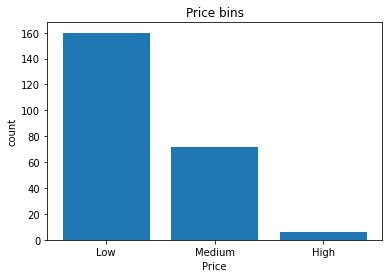

In [145]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

## STEP 6 - CREATE INDICATOR VARIABLES 

In [146]:
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [148]:
# Save the cleaned data
df.to_csv("cleaned_laptops.csv")